# Normalizing Flows

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tomo_challenge import load_data

Found classifier Random
You need to install the zotbin package:
  pip install git+https://github.com/dkirkby/zotbin.git
Found classifier ZotBin
Found classifier RandomForest
Found classifier IBandOnly


In [3]:
from zotbin.group import plotfbins
from zotbin.flow import learn_flow
from zotbin.util import prepare, get_signature

In [4]:
bands='riz'
include_colors=False
include_errors=False

In [5]:
#train_file='/media/data2/tomo_challenge_data/ugrizy/training.hdf5'
train_file='/media/data2/tomo_challenge_data/ugrizy_buzzard/training.hdf5'
#train_file = '/Users/david/Data/DESC/tomo/ugrizy/training.hdf5'
#train_file = '/Users/david/Data/DESC/tomo/ugrizy_buzzard/training.hdf5'
train_data = load_data(train_file, bands, errors=False, colors=False, array=True)
print(f'Loaded {len(train_data)} training rows.')

Loaded 5410171 training rows.


/home/dkirkby/DESC/tomo/tomo_challenge/data.py:89: UserWarning: Setting inf (undetected) bands to mag=30
  warnings.warn("Setting inf (undetected) bands to mag=30")


In [6]:
features, detected = prepare(train_data, bands)

Found 50677 galaxies with undetected flux in at least one band.


In [7]:
X = features[detected]

DC2:

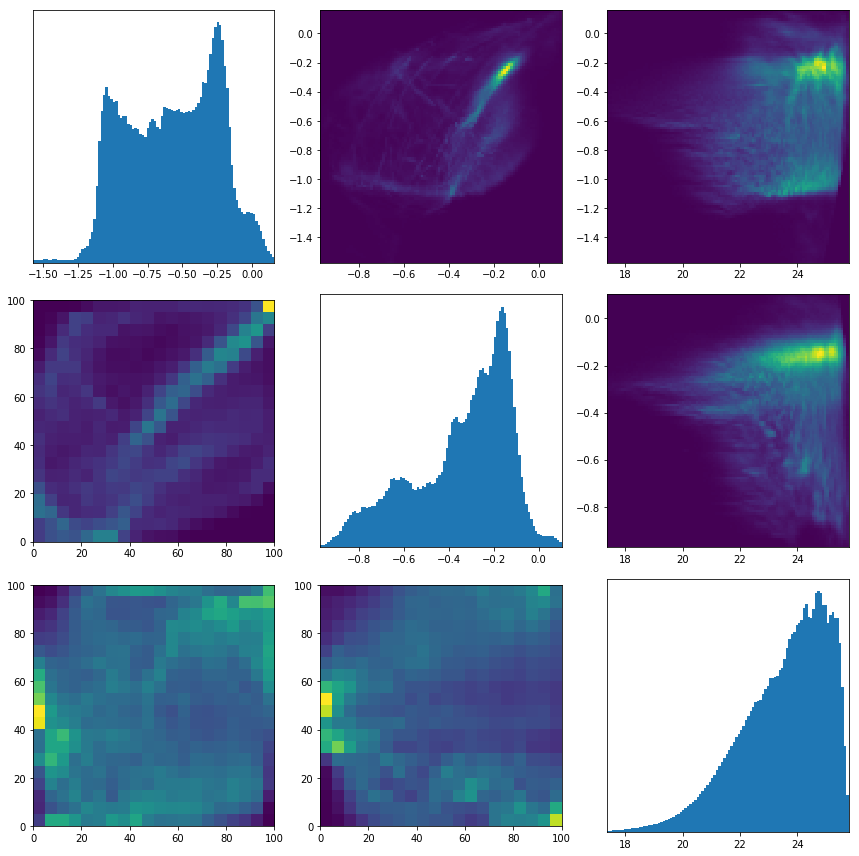

In [9]:
plotfbins(X, inset_pct=0.1, show_edges=False)

Buzzard:

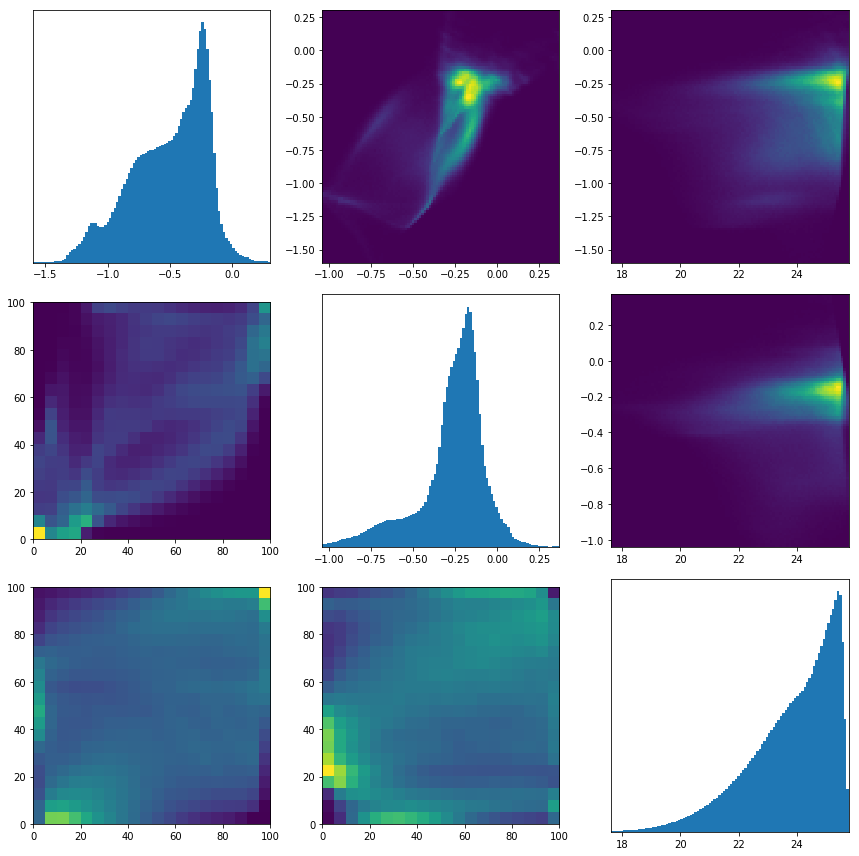

In [8]:
plotfbins(X, inset_pct=0.1, show_edges=False)

DC2:

epoch 25 loss 3.405


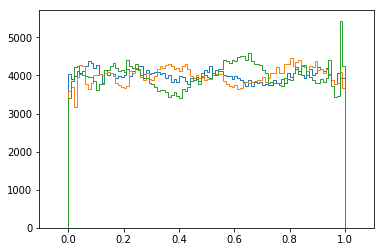

epoch 50 loss 3.361


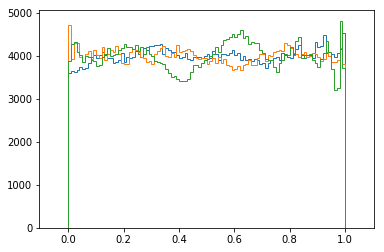

epoch 75 loss 3.382


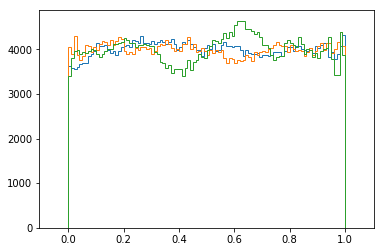

epoch 100 loss 3.347


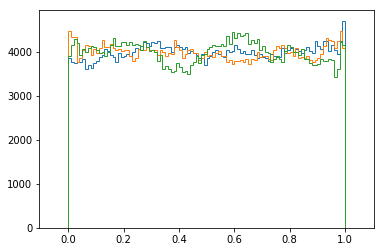

epoch 125 loss 3.366


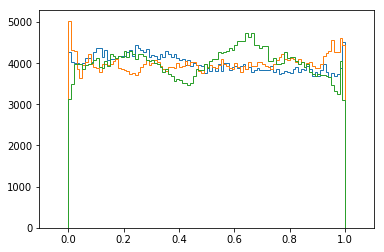

epoch 150 loss 3.344


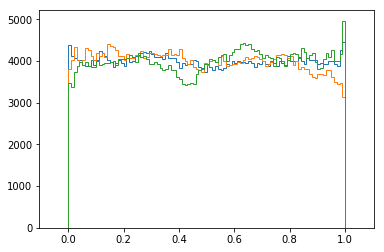

epoch 175 loss 3.351


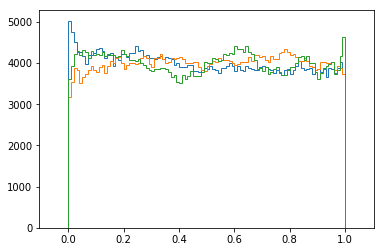

epoch 200 loss 3.310


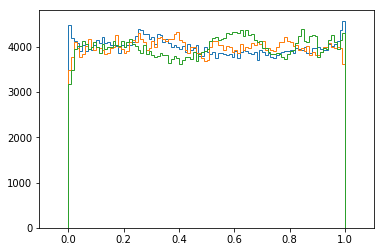

CPU times: user 1min 40s, sys: 7.96 s, total: 1min 48s
Wall time: 1min 17s


In [10]:
%time flow_map = learn_flow(X[:400000], interval=25)

In [13]:
%time U = flow_map(X)

CPU times: user 9.17 s, sys: 1.01 s, total: 10.2 s
Wall time: 1.65 s


In [14]:
np.all(np.isfinite(U)), U.dtype

(True, dtype('float32'))

In [16]:
np.savez('uniform_dc2_riz.npz', uniform=U, detected=detected)

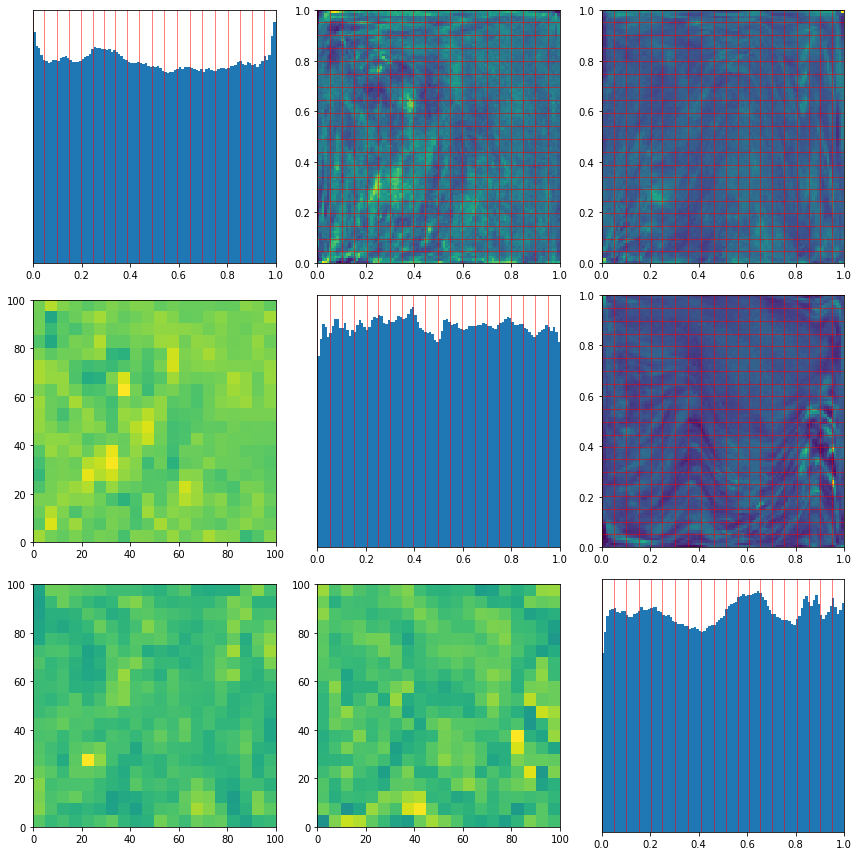

In [15]:
plotfbins(U, inset_pct=0)

Buzzard:

epoch 25 loss 3.266


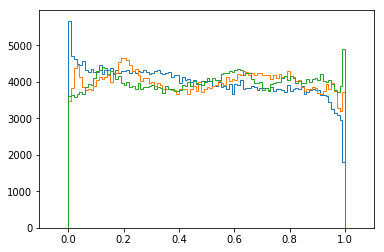

epoch 50 loss 3.256


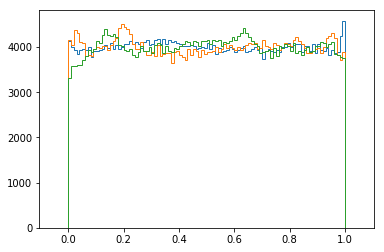

epoch 75 loss 3.230


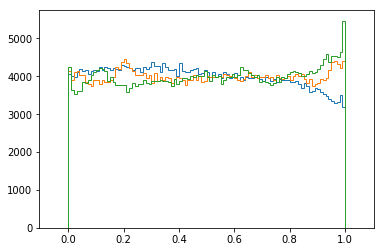

epoch 100 loss 3.233


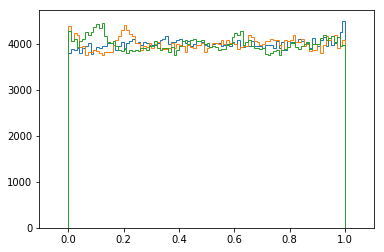

epoch 125 loss 3.203


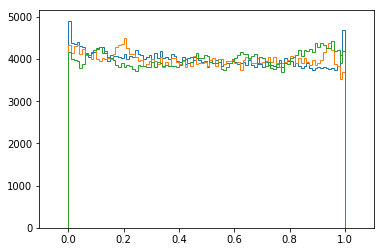

epoch 150 loss 3.245


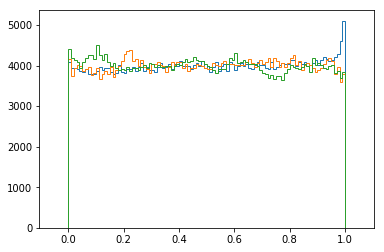

epoch 175 loss 3.215


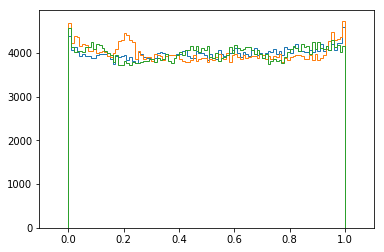

epoch 200 loss 3.228


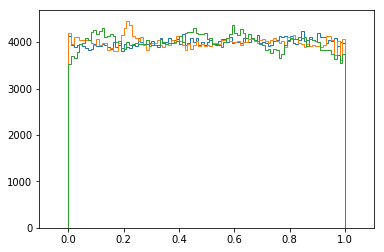

CPU times: user 1min 39s, sys: 7.8 s, total: 1min 47s
Wall time: 1min 15s


In [9]:
%time flow_map = learn_flow(X[:400000], interval=25)

In [10]:
%time U = flow_map(X)

CPU times: user 8.95 s, sys: 989 ms, total: 9.94 s
Wall time: 3.4 s


In [11]:
np.all(np.isfinite(U)), U.dtype

(True, dtype('float32'))

In [12]:
np.savez('uniform_buz_riz.npz', uniform=U, detected=detected)

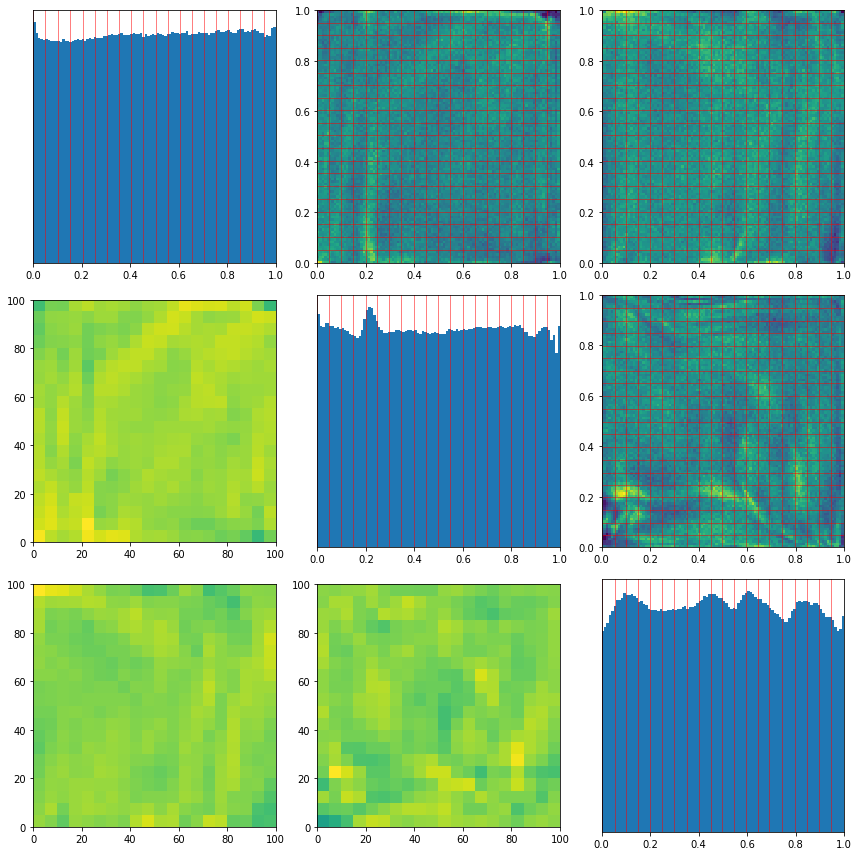

In [13]:
plotfbins(U, inset_pct=0)

In [14]:
!ls -lh uniform_*_riz.npz

-rw-rw-r-- 1 dkirkby dkirkby  67M Sep 13 08:08 uniform_buz_riz.npz
-rw-rw-r-- 1 dkirkby dkirkby 107M Sep 13 08:03 uniform_dc2_riz.npz
